<a href="https://colab.research.google.com/github/raymond92928/S5BAI/blob/main/Pytorch/Derivative_and_Linear_Regression(%E5%B0%8E%E6%95%B8%E5%92%8C%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Derivative

$$ y=x^2\\
\frac{dy}{dx}=2x$$

In [1]:
import torch

# Create tensor x
x = torch.tensor([2.], requires_grad = True)

# Create a tensor y according to y = x^2
y = x ** 2

# take the derivative
y.backward()

# print out the derivative at x=2
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor([4.])


# Partial Derivative

$$f(z,y,z) = z*a = z*(x+y) \\
\frac{\partial f}{\partial {z}}=x+y \\
\frac{\partial f}{\partial {x}} = \frac{\partial f}{\partial {a}}\frac{\partial a}{\partial {x}}=z \\
\frac{\partial f}{\partial {y}} = \frac{\partial f}{\partial {a}}\frac{\partial a}{\partial {y}}=z
$$

In [2]:
import torch

# Create tensor x, y, z
x = torch.tensor([1.], requires_grad = True)
y = torch.tensor([-2.], requires_grad = True)
z = torch.tensor([2.], requires_grad = True)

# definition function f
a = x+y
f = z*a

# take the derivative
f.backward()

# print out the derivative at x=1, y=-2, z = 2
print(z.grad, x.grad, y.grad)

tensor([-1.]) tensor([2.]) tensor([2.])


# Linear Regression

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

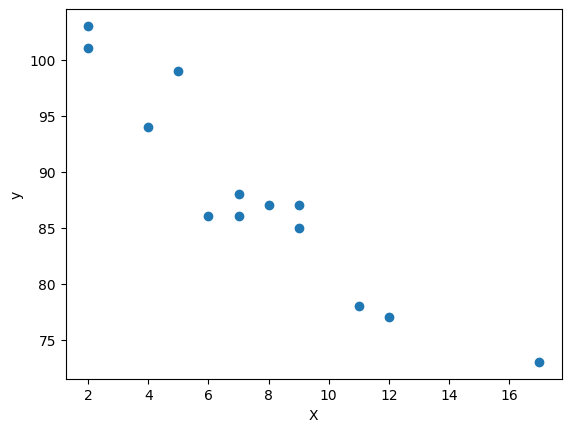

In [4]:
X = np.array([5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6])
y = np.array([99, 86, 87, 88, 101, 73, 103, 87, 94, 78, 77, 85, 86])
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
X_train = np.reshape(X, (-1, 1))
y_train = y
print(X_train.shape, y_train.shape)

(13, 1) (13,)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
w0 = model.intercept_ # bias
w1 = model.coef_ # coefficient
print(w0, w1)

103.73509933774834 [-2.06622517]


$ y = w_0 + w_1 * x_1$

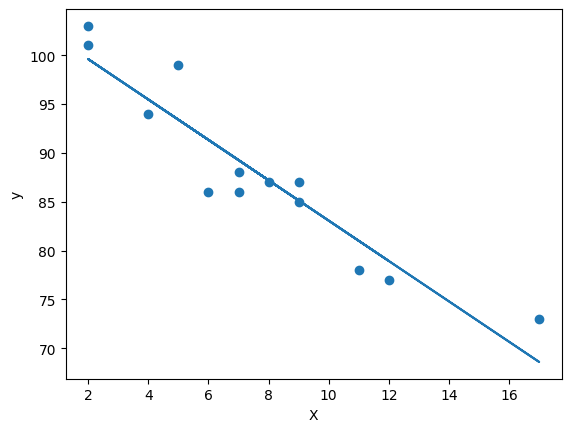

In [8]:
def myfunc(x):
    return w1*x + w0

mymodel = list(map(myfunc, X))

plt.scatter(X,y)
plt.plot(X, mymodel)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
y_pred = myfunc(10)
print(y_pred)

[83.07284768]


# Multiple linear regression

> ## $y=\alpha+\beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$ <br>
> ## $\mathbf{Y} = \mathbf{X}\beta$<br>
>$
\begin{bmatrix}
    Y_1 \\ Y_2\\ \vdots \\ Y_m
\end{bmatrix} = 
\begin{bmatrix}
    1 & X_{11} & \cdots & X_{1n} \\ 1 & X_{21} & \cdots & X_{2n}\\ \vdots & \vdots & \vdots & \vdots\\ 1 & X_{m1} & \cdots & X_{mn}
\end{bmatrix} \times
\begin{bmatrix}
   \alpha \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_n
\end{bmatrix}
 $


# Cost function(loss function) $y-f(x)$
>Goal: Choose $\alpha$, $\beta$ so that $y-f(x)$ is miniminzed.
## Residual sum of squares(RSS)
># $SS_{res}=\sum^n_{i=1}(y_i-f(x_i))^2$

Update the coefficient
$$ \beta(t+1) = \beta(t) - \alpha \nabla L(\beta)\\
\nabla L(\beta) = 
\begin{bmatrix}
\frac{\partial f}{\partial {\beta_1}} \\
\frac{\partial f}{\partial {\beta_2}} \\
\vdots \\
\frac{\partial f}{\partial {\beta_n}}
\end{bmatrix}$$
$\alpha$ is learn rate

# tensor computation

In [10]:
import torch
x = torch.Tensor([[1, 2, 3], [4, 5, 6]])
y = torch.Tensor([[1, 1, 1], [2, 2, 2]])

print(x + y)
print(torch.add(x, y))

tensor([[2., 3., 4.],
        [6., 7., 8.]])
tensor([[2., 3., 4.],
        [6., 7., 8.]])


In [11]:
v = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(torch.div(v, v+1))
print(torch.mul(v, v))

tensor([[0.5000, 0.6667, 0.7500],
        [0.8000, 0.8333, 0.8571],
        [0.8750, 0.8889, 0.9000]])
tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])


In [12]:
v = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(torch.cumsum(v, dim = 1))
print(torch.mean(v, 0))

tensor([[ 0.,  1.,  3.],
        [ 3.,  7., 12.],
        [ 6., 13., 21.]])
tensor([3., 4., 5.])


In [13]:
x2 = torch.Tensor([4, 2])
y2 = torch.Tensor([3, 1])
print(torch.dot(x2, y2))

mat = torch.Tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
vec = torch.Tensor([2, 2, 2, 2])
print(torch.mv(mat, vec))

tensor(14.)
tensor([20., 52.])


In [14]:
mat1 = torch.Tensor([[0, 1, 2], [3, 4, 5]])
mat2 = torch.Tensor([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]])
print(torch.mm(mat1, mat2))

tensor([[ 8.,  8.,  8.,  8.],
        [26., 26., 26., 26.]])


# Example

$$
y = 1+3*x_1+5*x_2\\
X = [1,x_1,x_2]\\
w = [1, 3, 5]^T
$$

We'll generate random data X, and get the y by the function above. Then we try to find the w

In [15]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0) # set random seed

w=torch.tensor([1,3,5]).float()

X=torch.cat([torch.ones(100,1),torch.randn(100,2)], dim=1)  # X=[1, x1, x2]
y=torch.mv(X, w) + torch.randn(100)*0.3
print(X.shape, y.shape)

torch.Size([100, 3]) torch.Size([100])


In [16]:
w_pred=torch.randn(3, requires_grad=True) # random number in w
lr = 0.01

In [17]:
losses=[]
epochs=200
for epoch in range(epochs+1):
    w_pred.grad=None   # clear the gradient data
    y_pred=torch.mv(X,w_pred)
    loss=torch.mean((y-y_pred)**2)  
    loss.backward()

    w_pred.data=w_pred.data - lr*w_pred.grad.data  # update gradient
    losses.append(loss.item())   # save loss data

    if (epoch) % 50 ==0:
        print(f"epoch:{epoch}, Loss: {loss.item():.3f}")

epoch:0, Loss: 27.845
epoch:50, Loss: 2.886
epoch:100, Loss: 0.387
epoch:150, Loss: 0.121
epoch:200, Loss: 0.089


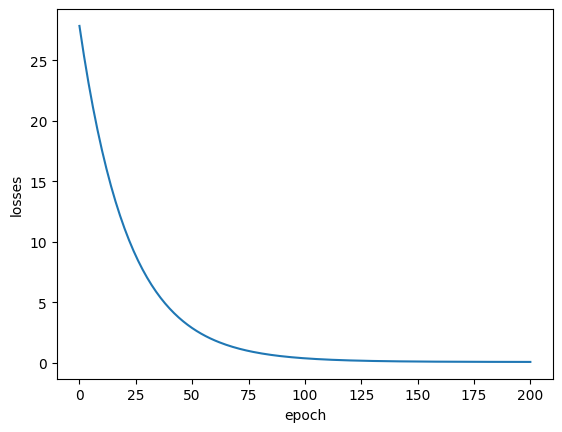

In [18]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("losses")
plt.show()